# CNN for Malaria Data

### In this lesson, we will train and model pictures of people who are infected with Malaria disease or not. Then we will create a page on huggingface. We will have the chance to upload pictures on this page and find out whether I have Malaria disease or not

<a href='https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria' target=_blank>You can find the data file here</a>

<img src=https://www.bereit-zu-reisen.de/content/dam/cf-pharma/bereit-zu-reisen/de_DE/reiseimpfungen/2.3.9%20Malaria-Prophylaxe.jpg width='600'>

In [1]:
#pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
labels = ['Parasitized','Uninfected']
img_path = 'cell_images/'

### At first, since it was a Macbook, there was something called .DS_Store, so I had to write the following codes.

In [4]:
os.listdir('cell_images/') 

['Parasitized', 'Uninfected']

In [5]:
dir_path = 'cell_images/'

# Delete the .DS_Store file in the cell_images/ directory
ds_store_path = os.path.join(dir_path, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

In [6]:
dir_path = 'cell_images/Parasitized/'

# Delete the .DS_Store file in the cell_images/ directory
ds_store_path = os.path.join(dir_path, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

In [7]:
dir_path = 'cell_images/Uninfected/'

# Delete the .DS_Store file in the cell_images/ directory
ds_store_path = os.path.join(dir_path, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

In [8]:
os.listdir('cell_images/') 

['Parasitized', 'Uninfected']

In [9]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):         
        img_list.append(img_path+label+'/'+img_file)   
        label_list.append(label)      

In [10]:
df=pd.DataFrame({'img':img_list,'label':label_list}) 

In [11]:
df.sample(5)

,img,label
5516,cell_images/Parasitized/C82P43ThinF_IMG_201508...,Parasitized
17887,cell_images/Uninfected/C144P105ThinF_IMG_20151...,Uninfected
14285,cell_images/Uninfected/C181P142ThinF_IMG_20151...,Uninfected
24249,cell_images/Uninfected/C59P20thinF_IMG_2015080...,Uninfected
24397,cell_images/Uninfected/C107P68ThinF_IMG_201509...,Uninfected


In [12]:
d={'Parasitized':1,'Uninfected':0}

In [13]:
df['encode_label']=df['label'].map(d)

In [14]:
df.sample(5)

,img,label,encode_label
19861,cell_images/Uninfected/C91P52ThinF_IMG_2015082...,Uninfected,0
3571,cell_images/Parasitized/C39P4thinF_original_IM...,Parasitized,1
26962,cell_images/Uninfected/C119P80ThinF_IMG_201510...,Uninfected,0
22441,cell_images/Uninfected/C116P77ThinF_IMG_201509...,Uninfected,0
23627,cell_images/Uninfected/C108P69ThinF_IMG_201509...,Uninfected,0


In [15]:
import matplotlib.pyplot as plt

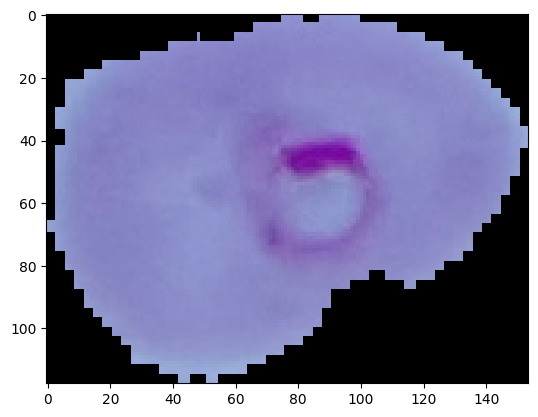

In [16]:
image=cv2.imread(str(df['img'][120]))
plt.imshow(image);


### Here we normalize and shrink the images

In [17]:
import numpy as np

In [19]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(50,50)) 
    img=img/255.0    
    x.append(img)      

In [20]:
x=np.array(x)

In [ ]:
x

In [21]:
print(x)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [22]:
import numpy as np

# For example, let's write the exact values ​​of the first image to a text file and display 2 digits after the comma
np.savetxt('first_image_values.txt', x[0].reshape(-1), fmt='%.2f')


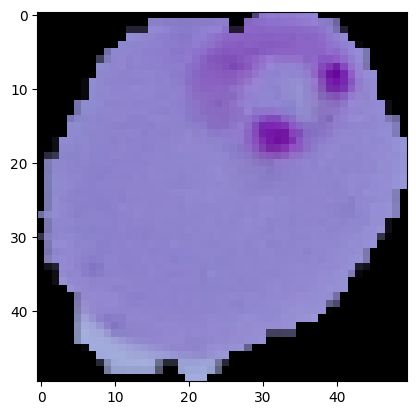

In [23]:
import matplotlib.pyplot as plt

# the first picture

plt.imshow(x[0])
plt.show()


In [24]:
y=df['encode_label']

In [25]:
y.value_counts()

encode_label
1    13779
0    13779
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

### CNN Convuliton Neural Networks

In [29]:
model=Sequential()
model.add(Input(shape=(50,50,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(.2))

model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(2, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=25,verbose=1)

Epoch 1/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.6222 - loss: 0.6431 - val_accuracy: 0.9352 - val_loss: 0.2480
Epoch 2/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9405 - loss: 0.1788 - val_accuracy: 0.9485 - val_loss: 0.1681
Epoch 3/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9503 - loss: 0.1555 - val_accuracy: 0.9387 - val_loss: 0.1739
Epoch 4/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9487 - loss: 0.1489 - val_accuracy: 0.9483 - val_loss: 0.1721
Epoch 5/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9502 - loss: 0.1433 - val_accuracy: 0.9474 - val_loss: 0.1685
Epoch 6/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9557 - loss: 0.1283 - val_accuracy: 0.9512 - val_loss: 0.1687
Epoch 7/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9556 - loss: 0.1301 - val_accuracy: 0.9534 - val_loss: 0.1552
Epoch 8/25
689/689 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9561 - loss: 0.1237 - 

In [31]:
loss,accuracy=model.evaluate(x_test,y_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9494 - loss: 0.1992


In [32]:
accuracy

0.947568953037262

In [33]:
tahmin=model.predict(x_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [34]:
model.save('Malaria.h5')

In [35]:
import matplotlib.pyplot as plt

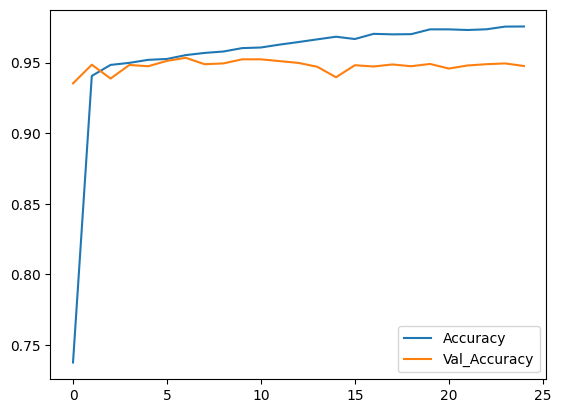

In [36]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [37]:
loss_f=pd.DataFrame(history.history)

<Axes: >

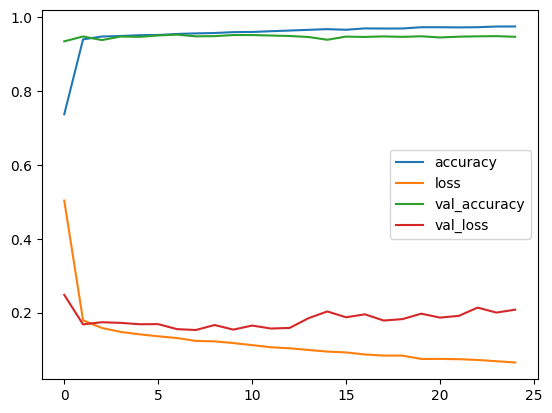

In [38]:
loss_f.plot()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [40]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[2586,  129],
       [ 160, 2637]])

In [41]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

In [42]:
import seaborn as sns

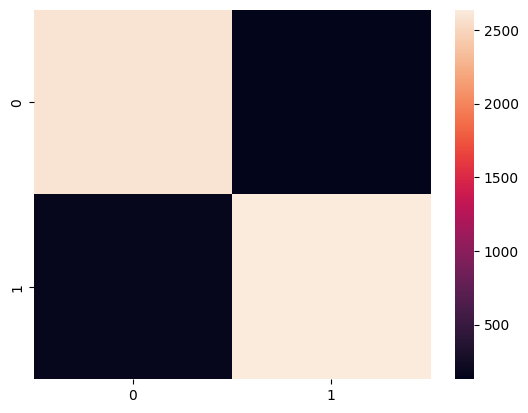

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [44]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2715
           1       0.95      0.94      0.95      2797

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



### In this lesson, accuracy: 0.9494 - loss: 0.1992
### [Click for the link of the Page I Created on huggingface](https://huggingface.co/spaces/SalihB/Malaria_hastaligi)